# [NML-25] Notebook 1: Introduction to the python toolbox

Responsible TA: [Jeremy Baffou](https://people.epfl.ch/jeremy.baffou)

# Instructions


**Expected output:**

Troughout the different lab session, you will have coding and theoretical questions. Coding exercises shall be solved within the specified space:
```python
# Your solution here ###########################################################
...
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```
Sometimes we provide variable names, such as `x = ...`; do not change names and stick to hinted typing, as they will be reused later.
Within the solution space, you can declare any other variable of function that you might need, but anything outside these lines shall not be changed, or it will invalidate your answers.

Theoretical questions shall be answered in the following markdown cell. The first line will be 
```markdown
**Your answer here:**
...
```

**Solutions:**
* Your code should be self-contained in the `.ipynb` file. The solution to the exercices will be provided in an external `.ipynb` file.

* Try to make your code clean and readable, it is a good training for the project. Provide meaningful variable names and comment where needed.

* You cannot import any other library than we imported, unless explicitly stated.

# Objective

This goal of this notebook is to have an introduction (or refresh) to elementary Python libaries and graph related toolbox. The exercices can be divided in two sections:
* Elementary Python Toolbox
* Basics of graph modelling/analysis

The first part covers some basic Python libraries that will be used multiple times during the exercice sessions and the project, namely [Pandas](https://pandas.pydata.org/docs/), [NumPy](https://numpy.org/devdocs/user/index.html) and [Scikit-learn](https://scikit-learn.org/stable/user_guide.html). If you know those libraries, most task in this section will be straightforward. If you struggle with some aspects, take time to revise the library documentations, as next sessions will rely on these tools. 

The second part of the notebook will introduce [Networkx](https://networkx.org/documentation/latest/tutorial.html), a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. We will start by building graphs from edge lists and from features, and then we will explore some basic graph properties. A tutorial on networkx can be found [here](https://networkx.github.io/documentation/stable/tutorial.html).



# Section I: Introduction to elementary Python toolbox

## Dataset

We will use the [Palmer Archipelago (Antarctica) penguin data](https://github.com/allisonhorst/palmerpenguins/tree/main) for this exercise session.

We provide a simplified version of the data in `penguins_size.csv`

Dataset reference: https://doi.org/10.5281/zenodo.3960218

In [1]:
# Plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Part 1: Pandas, to manipulate tabular data

In [2]:
import pandas as pd

### Question 1.1: Data loading and examination

**1.1.1** Read the `penguins_size.csv` file into a Pandas DataFrame, using the `read_csv` function.

In [4]:
# Your solution here ###########################################################
penguins: pd.DataFrame = pd.read_csv('./data/penguins_size.csv')
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**1.1.2** Extract the first five rows of the data frame and 10 random ones, then concatenate and display them. You can use the built-in `display` function.

In [5]:
# Your solution here ###########################################################

penguins_head = penguins.head(5)
penguins_random = penguins.sample(10, random_state=42)

penguins_concat = pd.concat([penguins_head, penguins_random])

display(penguins_concat)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
194,Chinstrap,Dream,50.9,19.1,196.0,3550.0,MALE
157,Chinstrap,Dream,45.2,17.8,198.0,3950.0,FEMALE
225,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,FEMALE
208,Chinstrap,Dream,45.2,16.6,191.0,3250.0,FEMALE
318,Gentoo,Biscoe,48.4,14.4,203.0,4625.0,FEMALE


**1.1.3** Look at the fourth entry: it is missing information, which is filled with `NaN` (not a number) values.
Let's drop all rows with missing values, then display the first 10 rows.

In [6]:
# Your solution here ###########################################################
penguins.dropna(inplace=True)

display(penguins.head(10))
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


**1.1.4** Compute and display the mean and std of `culmen_length_mm` and `body_mass_g`.

In [7]:
# Your solution here ###########################################################

print("Mean values:")
display(penguins[['culmen_length_mm','body_mass_g']].mean())

print("Standard deviation:")
display(penguins[['culmen_length_mm','body_mass_g']].std())

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Mean values:


culmen_length_mm      43.994311
body_mass_g         4209.056886
dtype: float64

Standard deviation:


culmen_length_mm      5.460521
body_mass_g         804.836129
dtype: float64

**1.1.5** Examine statistics of all columns with the `describe` method.

In [8]:
# Your solution here ###########################################################
penguins.describe()
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


**1.1.6** Plot a histogram of `body_mass_g`, split by `sex`.

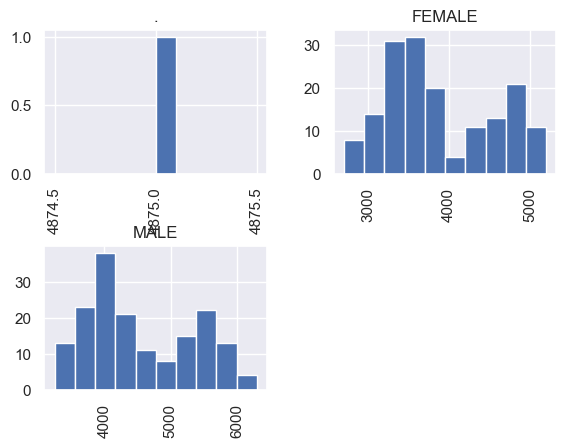

In [9]:
# Your solution here ###########################################################
penguins.hist(column='body_mass_g', by='sex')
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
plt.show()

_(Note that one penguin seems to have a missing value for the sex entry, leading to the additionnal pannel in the histogram.)_

**1.1.7** The [seaborn](https://seaborn.pydata.org/tutorial.html) library provides nicer visualization functionalities. Let's produce the same histogram with it. (Hint: Try to use the `hue` argument)

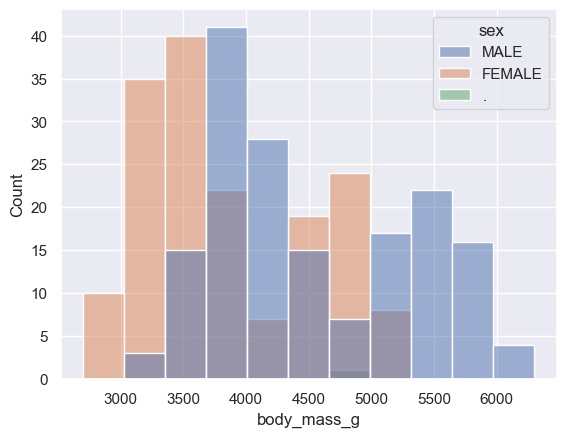

In [10]:
# Your solution here ###########################################################
sns.histplot(data=penguins, x='body_mass_g', hue='sex')
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
plt.show()

### Question 1.2: indexing and manipulation

NumPy allows manipulating vectors, matrices and higher order tensors as `arrays`. For instance vectors are 1d arrays, and matrices have two dimensions (rows and columns).

**1.2.1** Use the `loc` property to remove penguins without sex. (The `value_counts()` function should return only `Male` and `Female` entries)

In [11]:
# Your solution here ###########################################################
penguins = penguins.loc[penguins['sex'].isin(['MALE', 'FEMALE'])]
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
penguins["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

**1.2.2** Make `sex` a boolean property, with value `True` for `"FEMALE"` and `False` for `"MALE"`.

In [12]:
# Your solution here ###########################################################
penguins.loc[:, 'sex'] = penguins['sex'].map(lambda x: x == 'FEMALE')
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
penguins["sex"].value_counts()

sex
False    168
True     165
Name: count, dtype: int64

**1.2.3** In the next questions we will encode numerically the `island` and `species` property. Let's start by identifying the set of unique island's and species names.

In [13]:
# Your solution here ###########################################################
islands: list[str] = penguins.island.unique()
species: list[str] = penguins.species.unique()
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("islands:", islands)
print("species:", species)

islands: ['Torgersen' 'Biscoe' 'Dream']
species: ['Adelie' 'Chinstrap' 'Gentoo']


**1.2.4** For each island and species, add a column with boolean value, indicating whether the penguin comes from said island, or belong to said species.

In [14]:
# Your solution here ###########################################################
island_dummies = pd.get_dummies(penguins.island)
species_dummies = pd.get_dummies(penguins.species)
penguins = penguins.join(species_dummies)
penguins = penguins.join(island_dummies)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
display(penguins.loc[[13, 26, 39, 52]])

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,False,True,False,False,False,False,True
26,Adelie,Biscoe,40.6,18.6,183.0,3550.0,False,True,False,False,True,False,False
39,Adelie,Dream,39.8,19.1,184.0,4650.0,False,True,False,False,False,True,False
52,Adelie,Biscoe,35.0,17.9,190.0,3450.0,True,True,False,False,True,False,False


**1.2.5** In some case, we might want to encode species as integers.
Use the `map` method and a dictionary mapping species to numbers to get a `y_species` vector.

In [15]:
# Your solution here ###########################################################
y_species: pd.Series = penguins.species.map(dict(zip(species, range(len(species)))))
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
y_species

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int64

**1.2.6** Drop the `island` and `species` columns, since they are not needed anymore.

In [16]:
# Your solution here ###########################################################
penguins.drop(columns=['island', 'species'], inplace=True)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
assert 'species' not in penguins.columns and 'island' not in penguins.columns

In [17]:
penguins.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,False,True,False,False,False,False,True
1,39.5,17.4,186.0,3800.0,True,True,False,False,False,False,True
2,40.3,18.0,195.0,3250.0,True,True,False,False,False,False,True
4,36.7,19.3,193.0,3450.0,True,True,False,False,False,False,True
5,39.3,20.6,190.0,3650.0,False,True,False,False,False,False,True
6,38.9,17.8,181.0,3625.0,True,True,False,False,False,False,True
7,39.2,19.6,195.0,4675.0,False,True,False,False,False,False,True
12,41.1,17.6,182.0,3200.0,True,True,False,False,False,False,True
13,38.6,21.2,191.0,3800.0,False,True,False,False,False,False,True
14,34.6,21.1,198.0,4400.0,False,True,False,False,False,False,True


## Part 2: NumPy, scientific computing in Python



In [18]:
import numpy as np

### Question 2.1: Array Creation

**2.1.1** Pandas is built on top of NumPy. We can access the underlying array though the `values` attribute of a DataFrame. Let's put all but the `body_mass_g` columns in the *design matrix* `x`, and the y_mass one in the *target vector* `y_mass`.

In [19]:
# Your solution here ###########################################################
x: np.ndarray = penguins.drop(columns='body_mass_g').values
y_mass: np.ndarray = penguins.body_mass_g.values
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**2.1.2** Let's inspect the `shape` of these two arrays.

In [20]:
# Your solution here ###########################################################
print("x shape:", x.shape)
print("y shape:", y_mass.shape)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

x shape: (333, 10)
y shape: (333,)


**2.1.3** Then let's check the first five rows of `x`.

In [21]:
# Your solution here ###########################################################
x[:5,:]
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

array([[39.1, 18.7, 181.0, False, True, False, False, False, False, True],
       [39.5, 17.4, 186.0, True, True, False, False, False, False, True],
       [40.3, 18.0, 195.0, True, True, False, False, False, False, True],
       [36.7, 19.3, 193.0, True, True, False, False, False, False, True],
       [39.3, 20.6, 190.0, False, True, False, False, False, False, True]],
      dtype=object)

**2.1.4** Notice that the `dtype` of `x` is `object`, which means that it contains multiple types (namely `float` and `bool`). Let's convert it to `float` and check the first rows again.

In [22]:
# Your solution here ###########################################################
x = x.astype(float)
x[:5,:]
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

array([[ 39.1,  18.7, 181. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,
          1. ],
       [ 39.5,  17.4, 186. ,   1. ,   1. ,   0. ,   0. ,   0. ,   0. ,
          1. ],
       [ 40.3,  18. , 195. ,   1. ,   1. ,   0. ,   0. ,   0. ,   0. ,
          1. ],
       [ 36.7,  19.3, 193. ,   1. ,   1. ,   0. ,   0. ,   0. ,   0. ,
          1. ],
       [ 39.3,  20.6, 190. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,
          1. ]])

### Question 2.2: Array manipulation


**2.2.1** Extract the values of `Dream` and `Gentoo` columns into two vectors. Convert them to boolean.

In [23]:
dream: np.ndarray
gentoo: np.ndarray
# Your solution here ###########################################################
dream, gentoo = penguins.Dream.values.astype(bool), penguins.Gentoo.values.astype(bool)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**2.2.2** Count how many penguins come from the Dream island using the `sum` method. Repeat for the Gentoo specie.

In [24]:
# Your solution here ###########################################################
print("Dream's penguins:", dream.sum())
print("Gentoo's penguins:", gentoo.sum())
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Dream's penguins: 123
Gentoo's penguins: 119


**2.2.3** You can use a boolean mask to extract values from an array.
Compute the average mass and std of Dream's penguins using the corresponding NumPy functions.

In [25]:
# Your solution here ###########################################################
print("Average Dream's mass:", np.mean(y_mass[dream]))
print("Dream's mass std:", np.std(y_mass[dream]))
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Average Dream's mass: 3718.9024390243903
Dream's mass std: 411.2535548986968


**2.2.4** Now, compute again the average y_mass of Dream's penguins but without the `mean`function. Try using the scalar product between the mass vector and the Dream boolean mask.

In [26]:
# Your solution here ###########################################################
dream_avg_mass: float = np.sum(y_mass * dream) / np.sum(dream)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("Average Dream's mass:", dream_avg_mass)

Average Dream's mass: 3718.9024390243903


**2.2.5** Compute the standard deviation as an inner product too and compare with the values from previous answer.

In [27]:
# Your solution here ###########################################################
dream_std_mass: float = np.sqrt(np.sum(((y_mass - dream_avg_mass) * dream)**2) / np.sum(dream))
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("Dream's mass std:", dream_std_mass)

Dream's mass std: 411.25355489869673


### Question 2.3: Linear regression

Linear regression aims to find a weight vector $\mathbf w$ such that the target value $y_i$ can be retrieved as a weighted sum of the corresponding features $\mathbf x_i$, or in matrix notation
$$ \mathbf{X w} = \mathbf y. $$

Most of the time we cannot find an exact solution to this problem, therefore we introduce an error function and look for weights that minimize it.

**2.3.1** Find a solution for `w` by solving a linear system with `np.linalg.solve`.
For this method to work you need as many equations as variables, thus as many samples as the number of variables. Choose them randomly with `np.random.choice`.

Note that by selecting random rows, your design matrix might become singular. You can use `try` to rerun until it works.

In [28]:
n_samples, n_features = x.shape

while True:
    try:
        # Your solution here ###################################################
        lines = np.random.choice(n_samples, size=n_features, replace=False)
        w_solve: np.ndarray = np.linalg.solve(x[lines], y_mass[lines])

        # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        break
    except np.linalg.LinAlgError:
        pass

print("Weights:", w_solve)

Weights: [-7.72034424e+01  1.36501951e+03 -2.88324691e+01  3.39694918e+02
 -3.69738268e+18 -3.69738268e+18  5.14367896e+19 -5.14367896e+19
  3.69738268e+18  3.69738268e+18]


**2.3.2** Define a function to compute the mean squared error ([MSE](https://en.wikipedia.org/wiki/Mean_squared_error)) between the real `y` and the predicted one.

In [29]:
def mse(y_true: np.array, y_pred: np.array) -> float:
    # Your solution here #######################################################
    return np.mean((y_true - y_pred)**2)
    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**2.3.3** Use the previously computed weights to predict the penguins masses, then compute their MSE.

In [30]:
# Your solution here ###########################################################
mse_solve: float = mse(y_mass, np.matmul(x,w_solve))
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("MSE of random subproblem:", mse_solve)

MSE of random subproblem: 4.016522106573686e+38


**2.3.4** Randomly selecting samples is suboptimal as we ignore a significant part of the dataset. Let's look for a solution that uses all the data by using the pseudoinverse of `x`. (Hint: Remember the Linear Regression Equation)

In [31]:
# Your solution here ###########################################################
w_pinv: np.ndarray = np.linalg.pinv(x) @ y_mass
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**2.3.5** Compute the MSE of this solution prediction.

In [32]:
# Your solution here ###########################################################
mse_pinv: float = mse(y_mass, np.matmul(x,w_pinv))
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("MSE of psudoinverse solution:", mse_pinv)

MSE of psudoinverse solution: 80658.95570705224


### Question 2.4: Broadcasting

In this section, we focus on a convenient way to manipulate arrays which allows parallelizing operations over the same input.

**2.4.1** extract all island one-hot encoding from the data frame and convert to boolean.

In [33]:
# Your solution here ###########################################################
islands_oh: np.ndarray = penguins[islands].values.astype(bool)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("islands shape", islands_oh.shape)

islands shape (333, 3)


**2.4.2** Multiply the penguin masses to `islands_oh` to mask them in parallel.

In [34]:
try:
    # Your solution here ###########################################################
    masked_mass: np.ndarray = c * y_mass
    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
except ValueError as err:
    print("There's an ERROR:", err)

NameError: name 'c' is not defined

**2.4.3** The error indicates that arrays of different shapes cannot be automatically broadcasted! Using `np.newaxis`, add a dimension to `y_mass` and try again.

In [35]:
# Your solution here ###########################################################
masked_mass: np.ndarray = islands_oh * y_mass[:,np.newaxis]
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**2.4.4** Compute the average masses over different islands summing the masked masses along the corresponding axes.

In [36]:
# Your solution here ###########################################################
avg_masses: np.ndarray = np.sum(masked_mass, axis=0) / np.sum(islands_oh, axis=0)  
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("Average masses:")
print(dict(zip(islands, avg_masses)))

Average masses:
{'Torgersen': np.float64(3708.5106382978724), 'Biscoe': np.float64(4719.171779141105), 'Dream': np.float64(3718.9024390243903)}


**2.4.5** Use broadcasting and masking to compute standard deviations for each island.

In [37]:
# Your solution here ###########################################################
std_masses: np.ndarray = np.sqrt(np.sum((y_mass[:,np.newaxis] - avg_masses)**2 * islands_oh, axis=0) / np.sum(islands_oh, axis=0))
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("Mass standard deviations:")
print(dict(zip(islands, std_masses)))

Mass standard deviations:
{'Torgersen': np.float64(447.0136307284593), 'Biscoe': np.float64(788.4303859944843), 'Dream': np.float64(411.2535548986968)}


### Question 2.5: K-Nearest neighbors

Let's implement a k-nearest neighbors (kNN) classifier to identify penguin species from their physical attributes.

For a query data point, kNN predicts its label as the most frequent one between those of the k closest samples from the training dataset. In this setting, we will use euclidean distance between points:
$$ d(\mathbf x_i, \mathbf x_j) = \sqrt{\sum_{n=1}^D (x_{id} - x_{jd})^2} $$

In the next cell, we prepare to split the data in training and test sets.

In [38]:
physical_attributes = [
    "culmen_length_mm",
    "culmen_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
]

# We count the number of samples and set the amount of training data to 70% of that
n_samples = len(penguins)
samples_tr = int(n_samples * 0.7)

# We shuffle the indices of the data and take the first 70% to be in training
# Working with indices allows us to recognise which features go with which labels
rng = np.random.default_rng(11)
shuffled = rng.permutation(np.arange(n_samples))
idx_tr = shuffled[:samples_tr]
idx_te = shuffled[samples_tr:]

**2.5.1** Extract training and test features from the `penguins` data frame using the indices defined above and split the `y_species` series (computed in 1.2.5) accordingly.

You can use `DataFrame.iloc` to work with integer indexing in pandas.
Remember to extract arrays from data frames.

In [39]:
# Your solution here ###########################################################
x_tr: np.ndarray = penguins.iloc[idx_tr][physical_attributes].values.astype(float)
x_te: np.ndarray = penguins.iloc[idx_te][physical_attributes].values.astype(float)
y_tr: np.ndarray = y_species.iloc[idx_tr].values.astype(int)
y_te: np.ndarray = y_species.iloc[idx_te].values.astype(int)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("Training features:", x_tr.shape)
print("Test features:", x_te.shape)

Training features: (233, 4)
Test features: (100, 4)


**2.5.2** Write a function that computes pairwise distances between all query points and training ones. Use broadcasting and sum along corresponding axes to get an efficient implementation.

In [40]:
def pairwise_distances(x_query: np.ndarray, x_tr: np.ndarray) -> np.ndarray:
    """Compute pairwise distances

    Args:
        x_query (np.ndarray): Array of shape (n_queries, n_features)
        x_tr (np.ndarray): Array of shape (n_samples, n_features)

    Returns:
        np.ndarray: Distances in array of shape (n_queries, n_samples)
    """
    # Your solution here #######################################################
    x_query = x_query[:, np.newaxis, :] #shape (n_queries, 1, n_features)
    x_tr = x_tr[np.newaxis, :, :] # shape (1, n_samples, n_features)

    diff = (x_query - x_tr)**2 # shape (n_queries, n_samples, n_features)

    dist = np.sum(diff, axis=-1)

    return dist
    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


pdists_te = pairwise_distances(x_te, x_tr)
print("Distances shape:", pdists_te.shape)

Distances shape: (100, 233)


**2.5.3** For each query, identify the closest training samples using `np.argsort`. Use the `axis` argument to avoid iterating over the matrix.

In [41]:
# Your solution here ###########################################################
nearest_ngbs_te: np.ndarray = pdists_te.argsort(axis=-1)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print("5 nearest neighbors for query 4:", nearest_ngbs_te[4, :5])

5 nearest neighbors for query 4: [ 93 193  40   5 211]


**2.5.4** Write a function that takes an array of nearest neighbors for each query, together with training labels and the predefined $k$ and returns the predicted labels for queries.

In [42]:
def predict_labels(nearest_ngbs: np.ndarray, y_tr: np.ndarray, k: int) -> np.ndarray:
    """Predict labels from k-nearest neighbors

    Args:
        nearest_ngbs (np.ndarray): Array of neighbors indices, sorted by distance.
            Shape: (n_queries, n_samples)
        y_tr (np.ndarray): Training labels of shape (n_samples,)
        k (int): number of nearest neighbors to consider

    Returns:
        np.ndarray: Predicted labels of shape (n_queries,)
    """
    # Your solution here #######################################################
    # Extract nearest ngbs labels
    ngbs_labels = y_tr[nearest_ngbs[:,:k]]

    # Count label occurrencies for each query
    labels = np.unique(y_tr)

    counts = np.sum((ngbs_labels[:,:,np.newaxis] == labels[np.newaxis, :]), axis=1)

    # Return most frequent occurrence
    return np.argmax(counts, axis=-1)

    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


print(
    "Predicted labels of the first 10 queries:",
    predict_labels(nearest_ngbs_te[:10], y_tr, 5),
)
print("Real labels:                             ", y_te[:10])

Predicted labels of the first 10 queries: [0 0 1 2 2 2 2 1 0 0]
Real labels:                              [0 0 1 2 2 2 2 1 2 0]


**2.5.5** Compute the precision of kNN's predictions for both the training and test datasets for all k between 1 and 30.

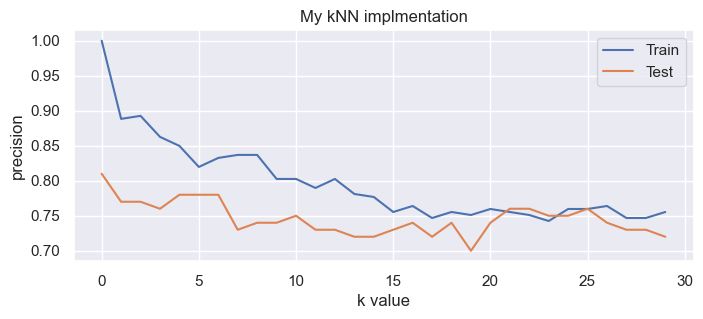

In [43]:
# Your solution here ###########################################################
precisions_te: list[float] = [np.mean(predict_labels(nearest_ngbs_te, y_tr, k) == y_te) for k in range(1,31)]


pdists_tr = pairwise_distances(x_tr, x_tr)
nearest_ngbs_tr: np.ndarray = pdists_tr.argsort(axis=-1)
precisions_tr: list[float] = [np.mean(predict_labels(nearest_ngbs_tr, y_tr, k) == y_tr) for k in range(1,31)]

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Plot
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
ax.plot(precisions_tr, label="Train")
ax.plot(precisions_te, label="Test")
ax.set(title="My kNN implmentation", ylabel="precision", xlabel="k value")
plt.legend()
plt.show()

## Part 3: Scikit-learn, machine learning toolbox

Scikit-learn provides implementations for many machine learning algorithms, which all share the basic common interface of `fit` and `predict` methods. Let's compare it to our kNN implementation.

**3.1** Import the k nearest neighbor classifier from Scikit-learn.

In [44]:
# Your solution here ###########################################################
from sklearn.neighbors import KNeighborsClassifier

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**3.2** Import the precision function.

In [45]:
# Your solution here ###########################################################
from sklearn.metrics import precision_score
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**3.3** Compute train and test precision for all k between 1 and 30. Use the "micro" option for the precision score.

In [46]:
# Your solution here ###########################################################
neigh = KNeighborsClassifier(n_neighbors=3)

sk_prec_tr: list[float] = [precision_score(y_true=y_tr, y_pred=KNeighborsClassifier(n_neighbors=k).fit(x_tr, y_tr).predict(x_tr), average='micro') for k in range(1,31)]
sk_prec_te: list[float] = [precision_score(y_true=y_te, y_pred=KNeighborsClassifier(n_neighbors=k).fit(x_tr, y_tr).predict(x_te), average='micro') for k in range(1,31)]

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**3.4** Plot scores and compare to your implementation.

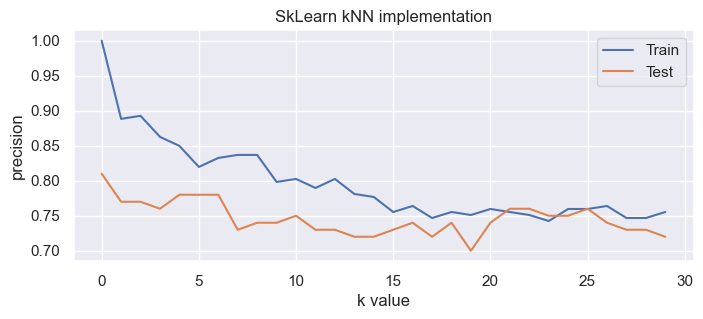

In [47]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
# Your solution here ###########################################################
ax.plot(sk_prec_tr, label='Train')
ax.plot(sk_prec_te, label='Test')

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

ax.set(title="SkLearn kNN implementation", ylabel="precision", xlabel="k value")
plt.legend()
plt.show()

# Section II: Introduction to Networkx

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

The following line is a [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html). It enables plotting inside the notebook.

In [2]:
%matplotlib inline

You may also try `%matplotlib notebook` for a zoomable version of plots.

## Part 1: Building Graphs from Edge Lists

### Dataset

We will play with a partial segment of the Tree of Life. The full version is available here: [Open Tree of Life](https://tree.opentreeoflife.org/about/taxonomy-version/ott3.0). In this tutorial, the dataset is reduced to the first 999 taxons (starting from the root node), which can be found in `data/taxonomy_small.tsv`.

![Public domain, https://en.wikipedia.org/wiki/File:Phylogenetic_tree.svg](https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Phylogenetic_tree.svg/800px-Phylogenetic_tree.svg.png)

In [3]:
# If needed, change this variable to the relative path to the taxonomy file
path ='./data/taxonomy_small.tsv'

In [4]:
tree_of_life = pd.read_csv(path, sep='\t\|\t?', encoding='utf-8', engine='python')

### Exploring the dataset

For a quick recap, we will go through a guided preliminary exploration of the dataset. We will use what we learned about `pandas` in Section 1.

We start by looking at the head of the dataframe.
The description of the entries is given here:
https://github.com/OpenTreeOfLife/reference-taxonomy/wiki/Interim-taxonomy-file-format

In [5]:
tree_of_life.head()

,uid,parent_uid,name,rank,sourceinfo,uniqname,flags,Unnamed: 7
0,805080,NaN,life,no rank,"silva:0,ncbi:1,worms:1,gbif:0,irmng:0",NaN,NaN,NaN
1,93302,805080.0,cellular organisms,no rank,ncbi:131567,NaN,NaN,NaN
2,996421,93302.0,Archaea,domain,"silva:D37982/#1,ncbi:2157,worms:8,gbif:2,irmng:12",Archaea (domain silva:D37982/#1),NaN,NaN
3,5246114,996421.0,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal,silva:AB302039/#2,NaN,NaN,NaN
4,102415,996421.0,Thaumarchaeota,phylum,"silva:D87348/#2,ncbi:651137,worms:559429,irmng...",NaN,NaN,NaN




Let us now drop some columns.

In [6]:
tree_of_life = tree_of_life.drop(columns=['sourceinfo', 'uniqname', 'flags','Unnamed: 7'])
tree_of_life.head()

,uid,parent_uid,name,rank
0,805080,NaN,life,no rank
1,93302,805080.0,cellular organisms,no rank
2,996421,93302.0,Archaea,domain
3,5246114,996421.0,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,102415,996421.0,Thaumarchaeota,phylum


Note that Pandas infers the type of values inside each column (in this case: int, float, string and string - run below).
The parent_uid column has float values because there was a missing value, converted to `NaN`.

In [7]:
print("Types of the columns in the dataframe:")
for col in tree_of_life.columns:
    print(f"{col}: {tree_of_life[col].dtype}")

Types of the columns in the dataframe:
uid: int64
parent_uid: float64
name: object
rank: object


To order the data, we can use the function `sort_values()`.

In [8]:
tree_of_life.sort_values(by='name').head()

,uid,parent_uid,name,rank
297,5246638,102415.0,AB64A-17,no rank - terminal
293,5246632,102415.0,AK31,no rank - terminal
298,5246637,102415.0,AK56,no rank - terminal
202,5246635,102415.0,AK59,no rank - terminal
204,5246636,102415.0,AK8,no rank - terminal


 *Remark:* Some functions do not change the dataframe (option `inline=False` by default). As you can see below, the `tree_of_life` dataframe remains unchanged.

In [9]:
tree_of_life.head()

,uid,parent_uid,name,rank
0,805080,NaN,life,no rank
1,93302,805080.0,cellular organisms,no rank
2,996421,93302.0,Archaea,domain
3,5246114,996421.0,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,102415,996421.0,Thaumarchaeota,phylum


Which classes of `rank` do we have?

In [10]:
tree_of_life['rank'].unique()

array(['no rank', 'domain', 'no rank - terminal', 'phylum', 'species',
       'order', 'family', 'genus', 'class'], dtype=object)

Can we filter only `species` entries?

In [11]:
tree_of_life[tree_of_life['rank'] == 'species'].head()

,uid,parent_uid,name,rank
7,5205649,4795965.0,uncultured marine crenarchaeote 'Gulf of Maine',species
8,5208050,4795965.0,uncultured marine archaeon DCM858,species
9,5205092,4795965.0,uncultured marine group I thaumarchaeote,species
10,5205072,4795965.0,uncultured Nitrosopumilaceae archaeon,species
11,5208765,4795965.0,uncultured marine archaeon DCM874,species


Ok, let us now find how many species entries do we have!

In [12]:
len(tree_of_life[tree_of_life['rank'] == 'species'])

912

For all the possible `rank`s:

In [13]:
tree_of_life['rank'].value_counts()

rank
species               912
no rank - terminal     58
no rank                12
genus                   8
order                   3
family                  3
domain                  1
phylum                  1
class                   1
Name: count, dtype: int64

Now, it is your turn!

### Question 1.1: Operations on columns

**1.1.1** Display the entry with name 'Archaea'.

In [14]:
tree_of_life.head()

,uid,parent_uid,name,rank
0,805080,NaN,life,no rank
1,93302,805080.0,cellular organisms,no rank
2,996421,93302.0,Archaea,domain
3,5246114,996421.0,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,102415,996421.0,Thaumarchaeota,phylum


In [15]:
# Your solution here ###########################################################
tree_of_life.query("name == 'Archaea'")
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

,uid,parent_uid,name,rank
2,996421,93302.0,Archaea,domain


**1.1.2** Display the entry of its parent. _(Hint: Remember of how the parent_id is used to link entities in the tree)_

In [16]:
# Your solution here ###########################################################
parent_uid = tree_of_life.query("name == 'Archaea'")['parent_uid'].values[0]

tree_of_life.query("uid == @parent_uid")
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

,uid,parent_uid,name,rank
1,93302,805080.0,cellular organisms,no rank


#### Extracting relevant information for the graph

Let us build the adjacency matrix of the graph. For that we need to reorganize the data. First we separate the nodes and their properties from the edges.

In [17]:
nodes = tree_of_life[['uid', 'name','rank']]
edges = tree_of_life[['uid', 'parent_uid']]

When using an adjacency matrix, nodes are indexed by their row or column number and not by a `uid`. Let us create a new index for the nodes.

In [18]:
nodes.head()

,uid,name,rank
0,805080,life,no rank
1,93302,cellular organisms,no rank
2,996421,Archaea,domain
3,5246114,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,102415,Thaumarchaeota,phylum


In [19]:
# Create a column for node index.
nodes.reset_index(level=0, inplace=True)
nodes = nodes.rename(columns={'index':'node_idx'})
nodes.head()

,node_idx,uid,name,rank
0,0,805080,life,no rank
1,1,93302,cellular organisms,no rank
2,2,996421,Archaea,domain
3,3,5246114,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,4,102415,Thaumarchaeota,phylum


In [20]:
# Create a conversion table from uid to node index.
uid2idx = nodes[['node_idx', 'uid']]
uid2idx = uid2idx.set_index('uid')
uid2idx.head()

,node_idx
uid,
805080,0
93302,1
996421,2
5246114,3
102415,4


For the edges, we should leverage a powerful function of `pandas`: the `join` function.

In [21]:
edges.head()

,uid,parent_uid
0,805080,NaN
1,93302,805080.0
2,996421,93302.0
3,5246114,996421.0
4,102415,996421.0


In [22]:
# Add a new column, matching the uid with the node_idx.
edges = edges.join(uid2idx, on='uid')
edges.head()

,uid,parent_uid,node_idx
0,805080,NaN,0
1,93302,805080.0,1
2,996421,93302.0,2
3,5246114,996421.0,3
4,102415,996421.0,4


In [23]:
# Do the same with the parent_uid.
edges = edges.join(uid2idx, on='parent_uid', rsuffix='_parent')
edges.head()

,uid,parent_uid,node_idx,node_idx_parent
0,805080,NaN,0,NaN
1,93302,805080.0,1,0.0
2,996421,93302.0,2,1.0
3,5246114,996421.0,3,2.0
4,102415,996421.0,4,2.0


In [24]:
# Drop the uids.
edges_renumbered = edges.drop(columns=['uid','parent_uid'])

The `edges_renumbered` table is a list of renumbered edges connecting each node to its parent.

In [25]:
edges_renumbered.head()

,node_idx,node_idx_parent
0,0,NaN
1,1,0.0
2,2,1.0
3,3,2.0
4,4,2.0


#### Building the (unweighted and undirected) adjacency matrix

**1.1.3** We will use numpy to build this matrix. Note that we don't have edge weights here, so our graph is going to be unweighted.

In [26]:
n_nodes = len(nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

for idx, row in edges.iterrows():
  # Your solution here #########################################################
  if np.isnan(row.node_idx_parent):
    continue
  i, j = int(row['node_idx']), int(row['node_idx_parent'])
  adjacency[i,j] = adjacency[j,i] = 1
  pass
  #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

adjacency[:15, :15]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

Congratulations, you have built the adjacency matrix!

#### Graph Creation

Let's create a graph object from the adjacency matrix using networkx.

In [27]:
# A simple command to create the graph from the adjacency matrix.
graph = nx.from_numpy_array(adjacency)

In addition, let us add some attributes to the nodes:

In [28]:
node_props = nodes.to_dict()

for key in node_props:
    nx.set_node_attributes(graph, node_props[key], key)

Let us check if it is correctly stored:

In [29]:
print(graph.nodes[3])
nodes.head()

{'node_idx': 3, 'uid': 5246114, 'name': 'Marine Hydrothermal Vent Group 1(MHVG-1)', 'rank': 'no rank - terminal'}


,node_idx,uid,name,rank
0,0,805080,life,no rank
1,1,93302,cellular organisms,no rank
2,2,996421,Archaea,domain
3,3,5246114,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,4,102415,Thaumarchaeota,phylum


### Question 1.2: Alternative ways to build the graph

**1.2.1** Build the graph directly from the `edges` table (without using the adjacency matrix). _(Hint: Create an empty graph object and iteratively add the edges)_

In [30]:
# Your solution here ###########################################################
graph = nx.Graph()

for idx, row in edges.iterrows():
    if np.isnan(row.node_idx_parent):
        continue
    i,j = int(row['node_idx']), int(row['node_idx_parent'])
    graph.add_edge(u_of_edge=i, v_of_edge=j)
    graph.add_edge(u_of_edge=j, v_of_edge=i)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [31]:
# sanity check
assert len(graph.nodes) == len(nodes)

**1.2.2** Build the graph from the initial `tree_of_life` table by directly iterating over the rows of this table (without building the adjacency matrix).

Store the final graph in the variable `graph`.

In [32]:
# Your solution here ###########################################################
graph = nx.Graph()

for idx, row in tree_of_life.iterrows():
    if np.isnan(row.parent_uid):
        continue
    i,j = int(row.uid), int(row.parent_uid)
    graph.add_edge(u_of_edge=i, v_of_edge=j)
    graph.add_edge(u_of_edge=j, v_of_edge=i)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**1.2.3** Get the adjacency matrix with `nx.adjacency_matrix(graph)` and compare it with what we obtained previously.

In [33]:
# Your solution here ###########################################################
new_adjency = nx.adjacency_matrix(graph)
np.sum(new_adjency-adjacency)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

np.int64(0)

#### Graph visualization

To conclude, let us visualize the graph. We will again take advantage of the readily available functions in `networkx`.

Draw the graph with two different [layout algorithms](https://en.wikipedia.org/wiki/Graph_drawing#Layout_methods).

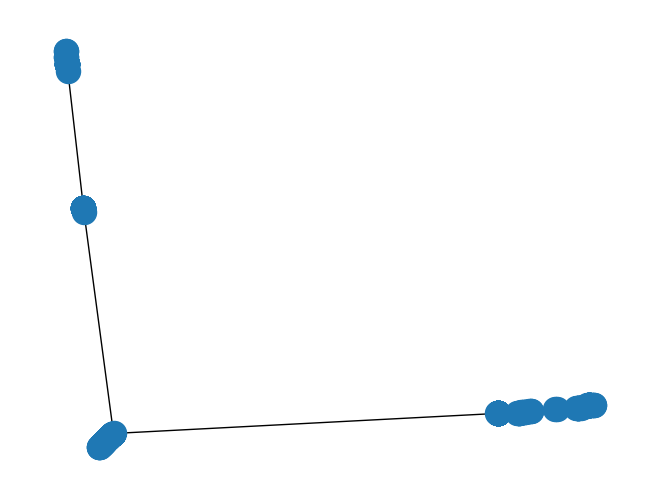

In [34]:
nx.draw_spectral(graph)

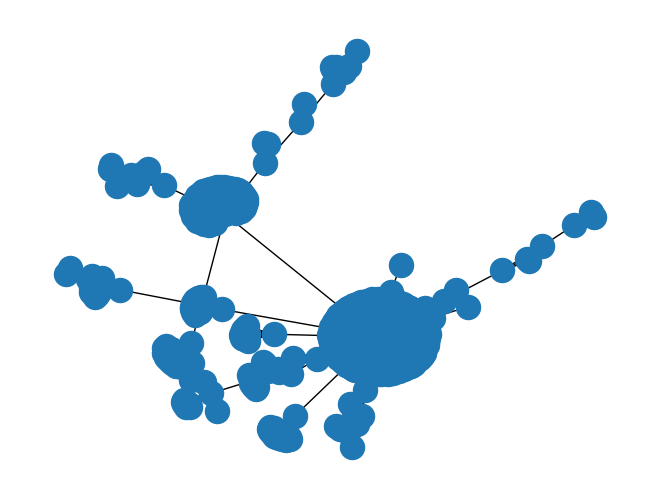

In [35]:
nx.draw_spring(graph)

Save the graph to disk in the `gexf` format, readable by gephi and other tools that manipulate graphs. You may now explore the graph using [gephi](https://gephi.org/) and compare the visualizations.

In [36]:
# Define your saving path
savepath = './tree_of_life.gexf'

In [37]:
nx.write_gexf(graph, savepath)

## Part 2: Building Graphs from Data

It often happens in real life that, when we wish to represent data as a graph, we do not have access to the underlying ground truth network. In this case, we need to make some assumptions about the graph/network structure. We will now explore a very basic and intuitive approach for graph construction based on similarity between nodes.

### Import and explore the data

We will play with the famous Iris dataset. This dataset can be found in many places on the net and was first released at <https://archive.ics.uci.edu/ml/index.php>. For example it is stored on [Kaggle](https://www.kaggle.com/uciml/iris/), with many demos and Jupyter notebooks you can test (have a look at the "kernels" tab).

![Iris Par Za — Travail personnel, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=144395](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Iris_germanica_002.jpg/251px-Iris_germanica_002.jpg)

In [38]:
path = 'data/iris.csv'

In [39]:
iris = pd.read_csv(path)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The description of the entries is given here:
https://www.kaggle.com/uciml/iris/home

In [40]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
# generate statistics
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Build a graph from the features

We are going to build a graph from these data. The idea is to represent iris samples (rows of the table) as nodes, with connections depending on their physical similarity.

The main question is how to define the notion of similarity between the flowers. For that, we need to introduce a measure of similarity. It should use the properties of the flowers and provide a positive real value for each pair of samples.

*Remark:* The value should increase with the similarity.

Let us separate the data into two parts: physical properties (`features`) and labels (`species`).

In [42]:
features = iris.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
species = iris.loc[:, 'Species']

In [43]:
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
species.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Similarity, distance and edge weight

You can define many similarity measures. One of the most intuitive and perhaps the easiest to program relies on the notion of distance. If a distance between samples is defined, we can compute the weight accordingly: if the distance is small, which means the nodes are similar, we want a strong connection between them (large weight).

#### Different distances

The cosine distance is a good candidate for high-dimensional data. It is defined as follows:
$$d(u,v) = 1 - \frac{u \cdot v} {\|u\|_2 \|v\|_2},$$
where $u$ and $v$ are two feature vectors.

The distance is proportional to the angle formed by the two vectors (0 if colinear, 1 if orthogonal, 2 if opposed direction).

Alternatives are the [$p$-norms](https://en.wikipedia.org/wiki/Norm_%28mathematics%29#p-norm) (or $\ell_p$-norms), defined as
$$d(u,v) = \|u - v\|_p,$$
of which the Euclidean distance is a special case, with $p=2$.

**2.1** Compute the Euclidean pairwise distances of all the points in the data. Use the `pdist` function from `scipy` (already imported).

In [45]:
# Your solution here ###########################################################
distances: np.ndarray = pdist(features.values,  metric='euclidean')
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# other optional metrics: 'cosine', 'cityblock', 'minkowski'

Now that we have a distance, we can compute the weights.

#### Distance to weights

A common function used to turn distances into edge weights is the Gaussian function:
$$\mathbf{W}(u,v) = \exp \left( \frac{-d^2(u, v)}{\sigma^2} \right),$$
where $\sigma$ is the parameter which controls the width of the Gaussian.
  
The function giving the weights should be positive and monotonically decreasing with respect to the distance. It should take its maximum value when the distance is zero, and tend to zero when the distance increases. Note that distances are non-negative by definition. So any funtion $f : \mathbb{R}^+ \rightarrow [0,C]$ that verifies $f(0)=C$ and $\lim_{x \rightarrow +\infty}f(x)=0$ and is *strictly* decreasing should be adapted. The choice of the function depends on the data.

Some examples:
* A simple linear function $\mathbf{W}(u,v) = \frac{d_{max} - d(u, v)}{d_{max} - d_{min}}$. As the cosine distance is bounded by $[0,2]$, a suitable linear function for it would be $\mathbf{W}(u,v) = 1 - d(u,v)/2$.
* A triangular kernel: a straight line between the points $(0,1)$ and $(t_0,0)$, and equals to 0 beyond it.
* The logistic kernel $\left(e^{d(u,v)} + 2 + e^{-d(u,v)} \right)^{-1}$.
* An inverse function $(\epsilon+d(u,v))^{-n}$, with $n \in \mathbb{N}^{+*}$ and $\epsilon \in \mathbb{R}^+$.
* You can find some more [here](https://en.wikipedia.org/wiki/Kernel_%28statistics%29).


**2.2** Let's use the Gaussian function. Define the gaussian's width (Hint: think what would make sense to define as $\sigma^2$ considering the statistics of the data)

In [51]:
# Your solution here ###########################################################
sigma = distances.mean()
weights_list: np.ndarray = np.exp(-distances**2 / sigma**2)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [52]:
# Turn the list of weights into a matrix.
weight_matrix = squareform(weights_list)

**2.3** Find the nodes with highest degree and display their respective entry in the `iris` dataframe. Do they belong to the same iris species?

In [66]:
# Your solution here ###########################################################
weights = weight_matrix.sum(axis=1)

top10 = np.argsort(weights)[-10:]
iris.iloc[top10]
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
127,128,6.1,3.0,4.9,1.8,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
126,127,6.2,2.8,4.8,1.8,Iris-virginica
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
78,79,6.0,2.9,4.5,1.5,Iris-versicolor


We have obtained a full matrix but we may not need all the connections (reducing the number of connections saves some space and computations!). We can sparsify the graph by removing the values (edges) below some fixed threshold. Let's see what kind of threshold we could use:

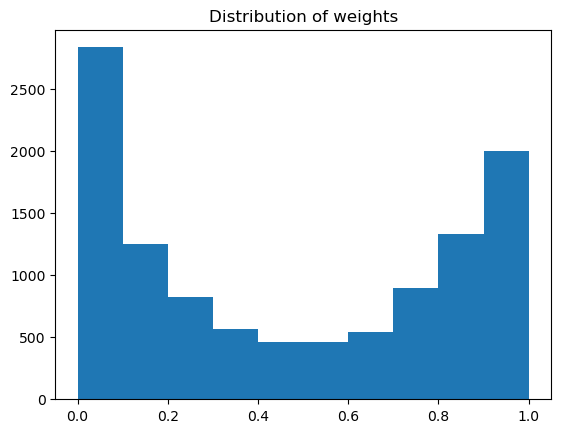

In [54]:
plt.hist(weights_list)
plt.title('Distribution of weights')
plt.show()

**2.4:** Plot the number of edges with respect to the threshold, for threshold values between 0 and 1.

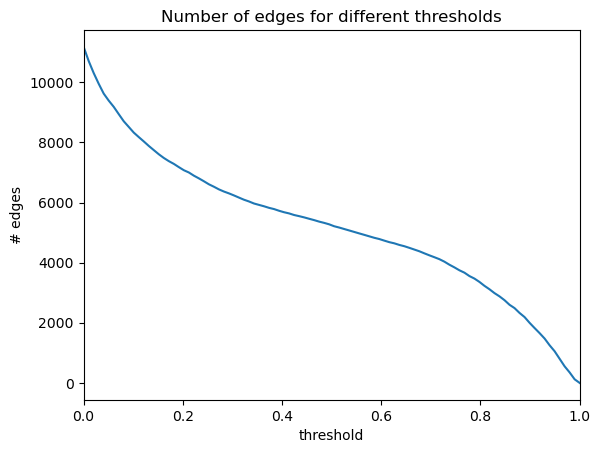

In [79]:
# Your solution here ###########################################################
threshold = np.linspace(0,1,100)
nb_edges_list = []

for th in threshold:
    weights_th = weights_list > th
    nb_edges= np.sum(weights_th)
    nb_edges_list.append(nb_edges)

plt.plot(threshold, nb_edges_list)
plt.title("Number of edges for different thresholds")
plt.xlim(0,1)
plt.xlabel("threshold")
plt.ylabel("# edges")
plt.show()
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

*Remark:* The distances presented here do not work well for categorical data.

**2.5:** Based on the above plot define a threshold for the sparsification. Remember, too high might result in disconnected components. Too low might result in a graph that is still too dense.

In [80]:
# Your solution here ###########################################################
thresh: float = 0.6
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
weight_matrix[weight_matrix < thresh] = 0

### Graph visualization

To conclude, let us visualize the graph. We will use the python module networkx.

In [81]:
# A simple command to create the graph from the adjacency matrix.
graph = nx.from_numpy_array(weight_matrix)

Let us try some direct visualizations using networkx.

In [82]:
# Let us add some colors
colors = species.values
colors[colors == 'Iris-setosa'] = 0
colors[colors == 'Iris-versicolor'] = 1
colors[colors == 'Iris-virginica'] = 2

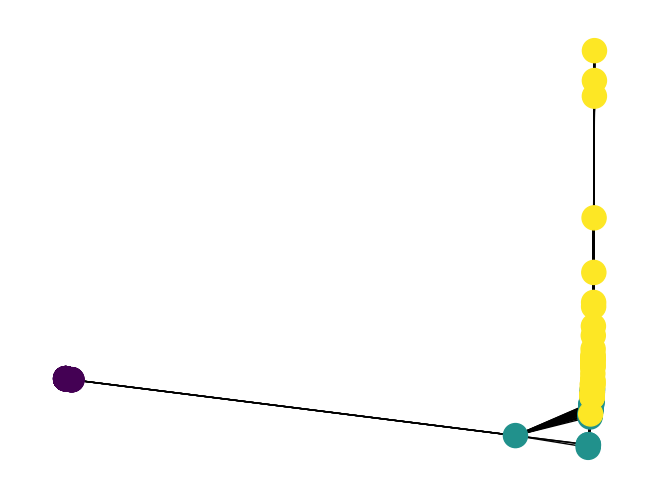

In [83]:
nx.draw_spectral(graph, node_color=colors)

It seems to be separated in 3 parts! Are they related to the 3 different species of iris?

Let's try another [layout algorithm](https://en.wikipedia.org/wiki/Graph_drawing#Layout_methods), where the edges are modeled as springs.

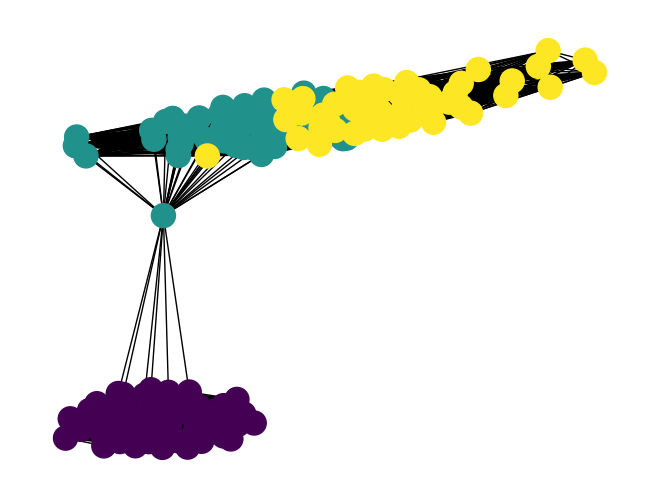

In [84]:
nx.draw_spring(graph, node_color=colors)

Save the graph to disk in the `gexf` format, readable by gephi and other tools that manipulate graphs. You may now explore the graph using gephi and compare the visualizations.

In [85]:
savepath = './'
nx.write_gexf(graph, os.path.join(savepath,'iris.gexf'))

**2.6:** Modify the experiment such that the distance is computed using normalized features, i.e., all features (columns of `features`) having the same mean and variance (hint: use pandas to compute the statistics of the dataframe's column).
This avoids having some features with too much importance in the computation of distance.


In [93]:
# Your solution here ###########################################################
features_norm = (features - features.mean()) / features.std()
distances = pdist(features_norm.values,  metric='euclidean')
sigma = distances.mean()
weights_list: np.ndarray = np.exp(-distances**2 / sigma**2)

# The rest is the same, define the edges with a kernel function, sparsify the edges with thresholding and build the graph. Visualize the graph and compare it with the one built with the original feature values.
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

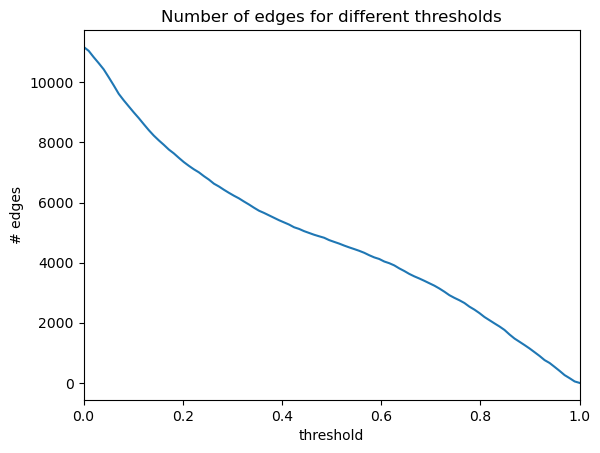

In [94]:
threshold = np.linspace(0,1,100)
nb_edges_list = []

for th in threshold:
    weights_th = weights_list > th
    nb_edges= np.sum(weights_th)
    nb_edges_list.append(nb_edges)

plt.plot(threshold, nb_edges_list)
plt.title("Number of edges for different thresholds")
plt.xlim(0,1)
plt.xlabel("threshold")
plt.ylabel("# edges")
plt.show()

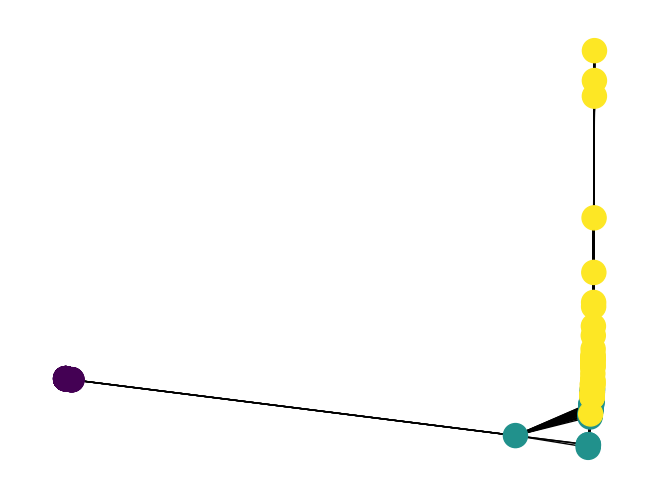

In [96]:
thresh = 0.6
weight_matrix[weight_matrix < thresh] = 0
graph = nx.from_numpy_array(weight_matrix)
nx.draw_spectral(graph, node_color=colors)

## Part 3: Graph Metrics

We will now look into some tools we can use to derive interesting properties of the graph under study. More precisely, we will be interested in the notion of [**Centrality**](https://en.wikipedia.org/wiki/Centrality) and [**Clustering**](https://en.wikipedia.org/wiki/Clustering_coefficient).

Briefly, let's recall that:
- Centrality refers to how much a given node is important in a network. The definition of importance depends on the application, it can be structural or related to features.
- Clustering is a measure of how often nodes tends to form cluster.

To perform such analysis, let's travel a bit and cross the ocean, direction New York!

In [97]:
# Dataset curated thanks to https://github.com/gboeing/osmnx
# Can be downloaded here: https://www.kaggle.com/datasets/crailtap/street-network-of-new-york-in-graphml?resource=download
ny_graph = nx.read_graphml('./data/manhatten.graphml.xml')
print(type(ny_graph))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


The dataset is the network of the different street of Manhattan, with nodes being cross-point and edges being roads. We can see that this graph has a specific type: `MultiDiGraph`. This means it is a directed multi-graph (two nodes can have multiple edges with different properties between them). In real life, it may occurs when we try to encode different type of relationships between different entities. However, in our setup we are interested simply in the road and not in extra possible link it may exist between. This is a bit too much information for now, so let's focus on key properties of the graph and convert it to a simpler representation: A directed graph.

### Graph Modelling and Visualization

**3.1** Create a DiGraph (directed graph) from the `ny_graph`. _(Hint: Create a directed empty graph object and iteratively add the edges by keeping only the first one encountered if multiple exist.)_

In [99]:
ny_graph.edges()

OutMultiEdgeDataView([('42459137', '42447105'), ('42459137', '42438490'), ('42459137', '596776089'), ('1773060099', '1773055865'), ('1773060099', '588455742'), ('373268484', '247221417'), ('373268484', '42436475'), ('42426374', '595703226'), ('42426374', '42446723'), ('42426374', '3099327964'), ('42446849', '42429633'), ('42446849', '42429595'), ('42446849', '373880031'), ('42429100', '42429104'), ('42429100', '42454300'), ('42429100', '42429094'), ('42442764', '42436283'), ('42442764', '42436285'), ('42442764', '42442766'), ('42452598', '42457421'), ('42452598', '42431805'), ('278609934', '42422283'), ('278609934', '3884569924'), ('278609934', '278642478'), ('278609934', '278609863'), ('42442770', '42451932'), ('42442770', '42442766'), ('42442755', '42445672'), ('42442755', '42436285'), ('42442755', '42442750'), ('42430468', '42448563'), ('1773076509', '1773076778'), ('1773076511', '42429752'), ('1773076511', '42429754'), ('1773076511', '1773076509'), ('1773076513', '42432184'), ('177

In [101]:
# Your solution here ###########################################################
simpler_ny_graph = nx.DiGraph()
for u, v, data in ny_graph.edges(data=True):
    if simpler_ny_graph.has_edge(u,v):
        continue
    else:
        simpler_ny_graph.add_edge(u,v)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [102]:
assert type(simpler_ny_graph) == nx.DiGraph

Good, now we have our directed graph. However, depending on our construction, we may have lose node features. For now on we will only be interested in the spatial coordinates (x,y) of the different cross points.

**3.2** Retrieve the x,y coordinates of each node in the initial graph `ny_graph` and store them in the simpler one `simpler_ny_graph`. _(Hint: Look at nx.get_node_attributes() and nx.set_node_attributes(). The name of the features can be accessed by indexing the graph with a node id.)_

In [105]:
ny_graph.nodes(data=True)

NodeDataView({'42459137': {'y': '40.7755735', 'x': '-73.9603796', 'osmid': '42459137', 'highway': 'traffic_signals'}, '1773060099': {'y': '40.7137811', 'x': '-73.9980743', 'osmid': '1773060099', 'highway': 'traffic_signals'}, '373268484': {'y': '40.7728065', 'x': '-73.9680288', 'osmid': '373268484'}, '42426374': {'y': '40.7982104', 'x': '-73.9523942', 'osmid': '42426374', 'highway': 'traffic_signals'}, '42446849': {'y': '40.7151089', 'x': '-74.0159512', 'osmid': '42446849'}, '42429100': {'y': '40.856503', 'x': '-73.932761', 'osmid': '42429100'}, '42442764': {'y': '40.852484', 'x': '-73.9276854', 'osmid': '42442764', 'highway': 'traffic_signals'}, '42452598': {'y': '40.734896', 'x': '-74.003154', 'osmid': '42452598'}, '278609934': {'y': '40.7096039', 'x': '-74.0015481', 'osmid': '278609934', 'highway': 'traffic_signals'}, '42442770': {'y': '40.8537128', 'x': '-73.9267875', 'osmid': '42442770', 'highway': 'traffic_signals'}, '42442755': {'y': '40.8511764', 'x': '-73.9286408', 'osmid': '4

In [109]:
# Your solution here ###########################################################
x_pos : dict = nx.get_node_attributes(ny_graph, name='x')
y_pos : dict = nx.get_node_attributes(ny_graph, name='y')
nx.set_node_attributes(simpler_ny_graph, values=x_pos, name='x')
nx.set_node_attributes(simpler_ny_graph, values=y_pos, name='y') # store x,y coordinates in `simpler_ny_graph`
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We introduced the graph as being a map on Manhattan, it is now time to see it.

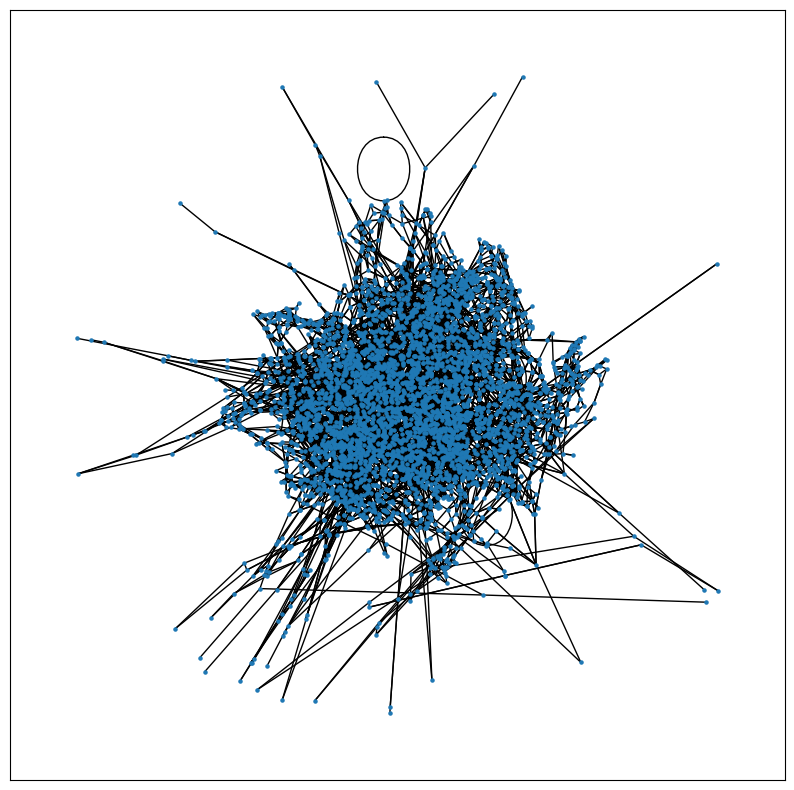

In [110]:
fig,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx(simpler_ny_graph,arrows=False,ax=ax,node_size=5,with_labels=False,)

You would probably agree that it is not the clearest map of new york ever created. This is due to how networkx plots graph. If you do not provide with insights on where the nodes are located, it will try to make a "meaningful" representation of the graph. But it is not always a success... Hopefully we do have spatial information about the nodes! What a chance we kept those x and y coordinates.

**3.3** Using the `x_pos` and `y_pos`, create a dictionnary that maps each node id to a numpy array with the coordinates in float format.

In [124]:
# Your solution here ###########################################################
pos = dict()
for node_id in simpler_ny_graph.nodes:
    pos[node_id] = np.array([simpler_ny_graph.nodes[node_id]['x'], simpler_ny_graph.nodes[node_id]['y']], dtype=np.float64)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [125]:
assert pos['2895441122'].dtype == np.float64

Now we can plot again our graph. Note how it is much faster because it doesn't have to compute a complicated layout for the graph now that it has the node coordinates.

Text(0.5, 0.98, 'View of Manhattan Roads')

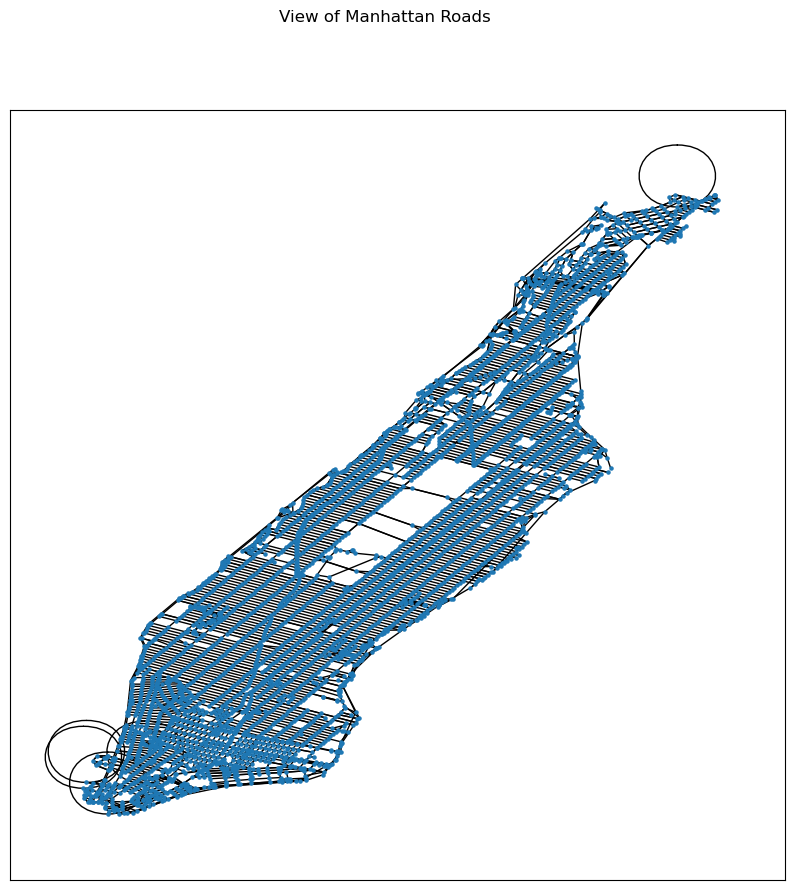

In [126]:
fig,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx(simpler_ny_graph,pos,arrows=False,ax=ax,node_size=5,with_labels=False)
fig.suptitle('View of Manhattan Roads')

### Clustering Coefficient

The graph modelling the underlying network of the street of New York can be studied in many ways. We will first focus on the notion of [clustering](https://en.wikipedia.org/wiki/Clustering_coefficient). Recall from the lecture that the clustering coefficient of a node quantifies how close to a clique (fully connected graph) is the subgraph defined by the node and its neighborhood.

Before doing the computations, based on the very specific structure of the street of new york, do you think that the clustering coefficient will be on average low or high?

**3.4** Compute the clustering coefficients for all nodes in the graph. _(Starting from this exercice and for the rest of the notebook, only use `simpler_ny_graph` for computations)_

In [127]:
from networkx import clustering

In [128]:
# Your solution here ###########################################################
ny_clustering : dict = clustering(simpler_ny_graph)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**3.5** Normalize the clustering values using min-max normalization (0-1 range) to create a color gradient of the clustering value of each node for latter visualization. (Check [cmap](https://matplotlib.org/stable/users/explain/colors/colormaps.html) from matplotlib for more information.)


In [136]:
# Your solution here ###########################################################
min_clustering : float = min(ny_clustering.values())
max_clustering : float = max(ny_clustering.values())
normalized_clustering : dict = {k: (v-min_clustering) / (max_clustering-min_clustering) for k,v in ny_clustering.items()} # key = node_ids, values = normalized clustering values
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Text(0.5, 0.98, 'Clustering coefficients over Manhattan Roads')

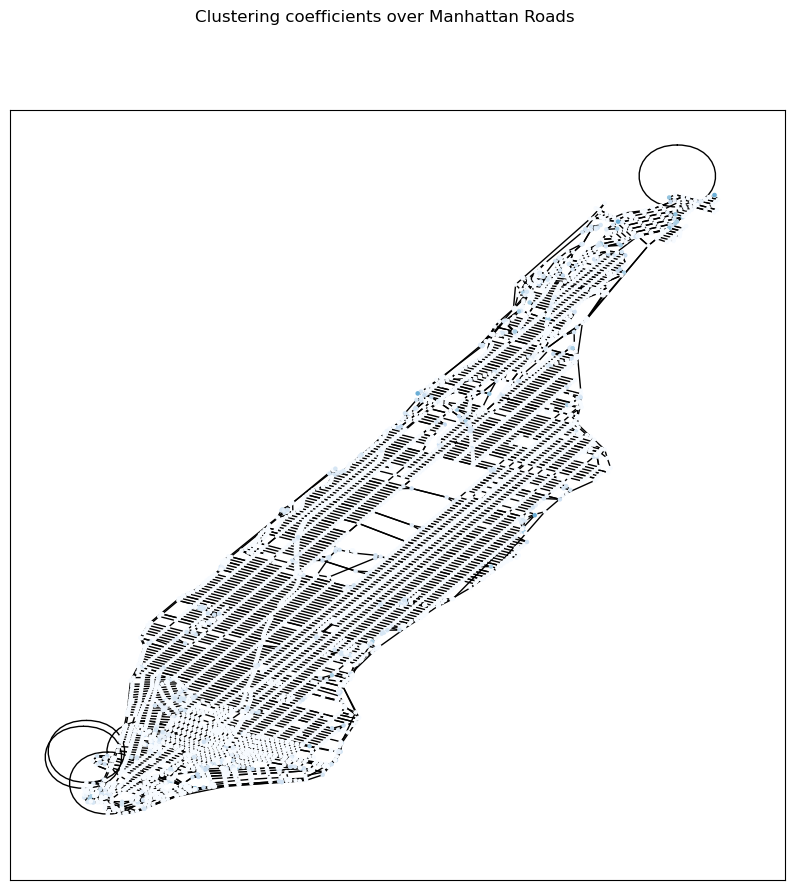

In [137]:
# Plot of clustering coefficients on the graph
cmap = plt.cm.Blues
color_mapping = {node_id: cmap(norm_clustering) for node_id,norm_clustering in normalized_clustering.items()}
fig,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx(simpler_ny_graph,pos,arrows=False,ax=ax,node_color=list(color_mapping.values()),node_size=5,with_labels=False)
fig.suptitle('Clustering coefficients over Manhattan Roads')

**3.6** We can see that most of the nodes are homogeneous with a low clustering coefficient. Was this expected?


**Your answer here:**


Yes because the street are not a clique but a lattice graph

### Node Centrality

Another important notion in graph is the notion of [centrality](https://en.wikipedia.org/wiki/Centrality) for nodes in a graph. In short, it can be summarized as a set of functions that creates a ranking of each nodes based on a notion of importance in the graph. The latter is usually defined according to the application. In our case, we are interested in a road network and we can easily connect the notion of importance of a road to the one of shortest path. Indeed, a road that belongs to many shortest paths in the graph is very important for the flow and connectivity of the graph. Let's see how it works on our road dataset!

#### Betweenness Centrality

We will begin our analysis with the [betweenness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality). It is a measure of how central a node is in terms of shortest path. In other word, a node $v$ has a high centrality if many shortest paths connecting any two other nodes $(s,t)$ go trough $v$.

In [138]:
from networkx import betweenness_centrality

**3.7** Compute the betweenness centrality for all nodes in the graph. _(Hint: set `normalized=False` in the function arguments to avoid latter scaling issues when we will apply the color map.)_

In [140]:
# Your solution here ###########################################################
b_centrality : dict = betweenness_centrality(simpler_ny_graph, normalized=False)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Let's have a look at these centrality values (It is always good practice to have an idea of the kind of post-processing you want to apply on them later on.)

Text(0.5, 0.98, 'Histogram of betweenness centrality values')

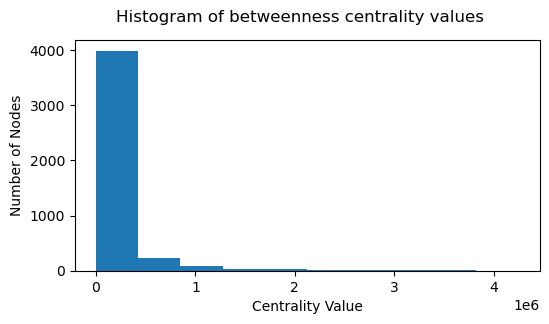

In [141]:
# Plot centrality histogram
fig,ax = plt.subplots(figsize=(6,3))
ax.hist(b_centrality.values())
ax.set_xlabel('Centrality Value')
ax.set_ylabel('Number of Nodes')
fig.suptitle('Histogram of betweenness centrality values')

We can see that the centrality values seems to follow a log normal distribution that we can normalize to have a better visual representation of the scale of results.

**3.8** Transform the centrality values using log scaling and z-normalization. _(Hint: Do not forget to add a small terms $\epsilon<<0$ in the log function to avoid evaluation of zero values.)_

In [166]:
# Your solution here ###########################################################
log_centrality: dict = {k: np.log(1e-8 + v) for k,v in b_centrality.items()} # key = node_ids, values = log centrality values
mean_centrality : np.array = np.mean(np.array(list(log_centrality.values())))
std_centrality : np.array = np.std(np.array(list(log_centrality.values())))
normalized_centrality : dict = {k: (v-mean_centrality)/std_centrality for k,v in log_centrality.items()} # key = node_ids, values = normalized centrality values
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Text(0.5, 0.98, 'Betweenness Centrality over Manhattan Roads')

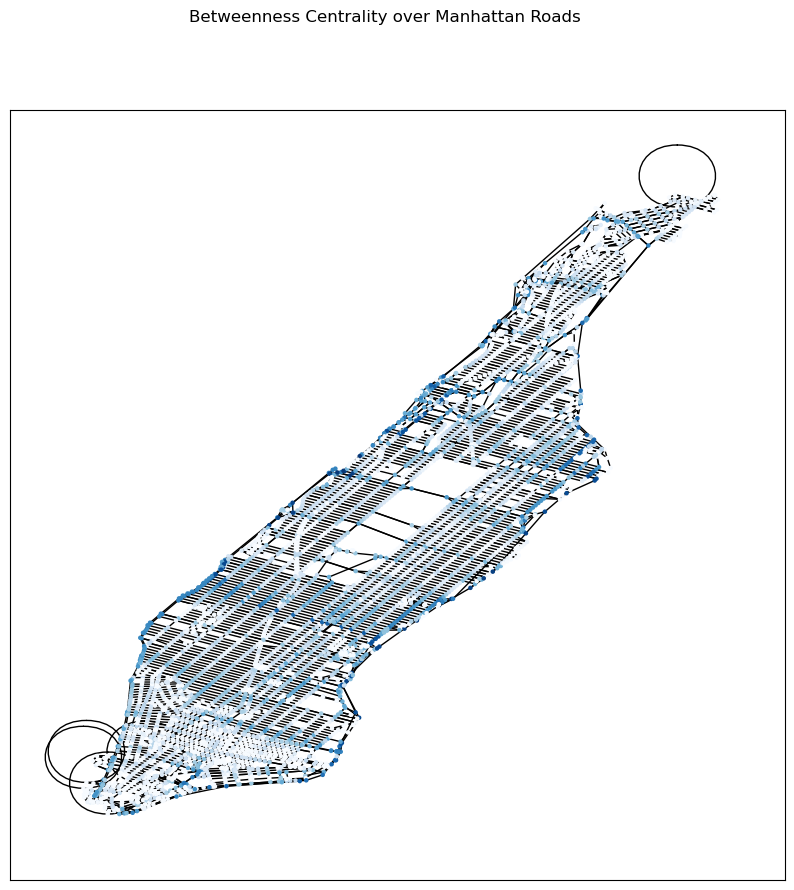

In [167]:
# Plot of centrality coefficients on the graph
cmap = plt.cm.Blues
color_mapping = {node_id: cmap(norm_centrality) for node_id,norm_centrality in normalized_centrality.items()}
fig,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx(simpler_ny_graph,pos,arrows=False,ax=ax,node_color=list(color_mapping.values()),node_size=5,with_labels=False)
fig.suptitle('Betweenness Centrality over Manhattan Roads')

**3.9** Give a brief interpretation of the previous plot (why does nodes on the border of the graph have higher centrality? What happens around Central Park?)

**Your answer here:**


---

#### Closeness Centrality

We will now look at another notion of centrality, the [closeness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality). This metric is also connected to the notion of shortest path. Here, a node $v$ has high centrality if the average shortest path distance to any other nodes is low (meaning that we can quickly reach any other nodes $u$ in the network starting from $v$.) More formally, it is defined as $C(v)=\frac{n-1}{\sum_{u=1}^{n-1}d(v,u)}$, where $d(v,u)$ is the shortest path distance between nodes $v$ and $u$.

**3.10** Compute the betweenness centrality for all nodes in the graph.

In [148]:
from networkx import closeness_centrality

In [149]:
# Your solution here ###########################################################
c_centrality : dict = closeness_centrality(simpler_ny_graph)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Text(0.5, 0.98, 'Histogram of closeness centrality values')

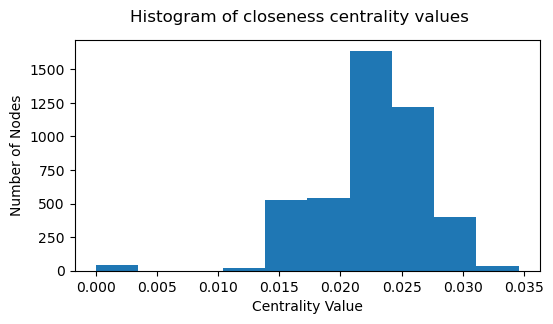

In [150]:
fig,ax = plt.subplots(figsize=(6,3))
ax.hist(c_centrality.values())
ax.set_xlabel('Centrality Value')
ax.set_ylabel('Number of Nodes')
fig.suptitle('Histogram of closeness centrality values')

It looks again like a known distribution (Gaussian in this case). So let's normalize it!

**3.11** Transform the centrality values using z-normalization.

In [170]:
# Your solution here ###########################################################
mean_centrality : np.array = np.mean(np.array(list(c_centrality.values())))
std_centrality : np.array = np.std(np.array(list(c_centrality.values())))
normalized_centrality : dict = {k: (v-mean_centrality)/std_centrality for k,v in c_centrality.items()} # key = node_ids, values = normalized centrality values
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Text(0.5, 0.98, 'Closeness Centrality over Manhattan Roads')

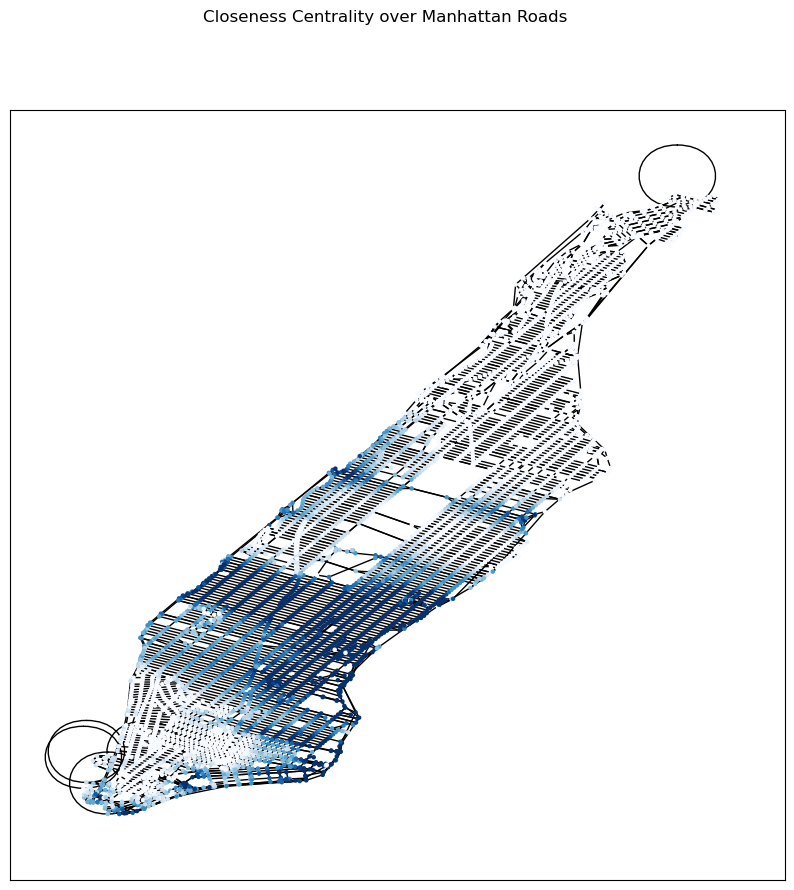

In [171]:
# Plot of centrality coefficients on the graph
cmap = plt.cm.Blues
color_mapping = {node_id: cmap(norm_centrality) for node_id,norm_centrality in normalized_centrality.items()}
fig,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx(simpler_ny_graph,pos,arrows=False,ax=ax,node_color=list(color_mapping.values()),node_size=5,with_labels=False)
fig.suptitle('Closeness Centrality over Manhattan Roads')

**3.12** Give a brief interpretation of the previous plot (why does the centrality follows this vertical (south-north) distribution over roads?)

**Your answer here:**
